<a href="https://colab.research.google.com/github/muscak/Data-Analysis-Yearly-CO2-Emission/blob/main/CO2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The prupose of this study is to 
*   get some insights about the CO<sub>2</sub> Emission of the world and some specific countries
*   relationship between the CO<sub>2</sub> emission and the other parameters
*   practice the tools and methods of Pyhon based on my [basics](https://github.com/muscak/Basics) repo on GitHub.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files
from google.colab import drive

In [44]:
drive.mount('/content/gdrive') # Mount the google drive 

# Read the data from .csv file
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ Data-Analysis-Yearly-CO2-Emission/data/energy.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   55440 non-null  int64  
 1   Country                      55440 non-null  object 
 2   Energy_type                  55440 non-null  object 
 3   Year                         55440 non-null  int64  
 4   Energy_consumption           44287 non-null  float64
 5   Energy_production            44289 non-null  float64
 6   GDP                          40026 non-null  float64
 7   Population                   46014 non-null  float64
 8   Energy_intensity_per_capita  50358 non-null  float64
 9   Energy_intensity_by_GDP      50358 non-null  float64
 10  CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.7+ MB


Removing `Unnamed: 0` column as it's some kind of an index from the previous versions of the `.csv` file.

In [45]:
df = df.drop('Unnamed: 0', axis='columns') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   Energy_type                  55440 non-null  object 
 2   Year                         55440 non-null  int64  
 3   Energy_consumption           44287 non-null  float64
 4   Energy_production            44289 non-null  float64
 5   GDP                          40026 non-null  float64
 6   Population                   46014 non-null  float64
 7   Energy_intensity_per_capita  50358 non-null  float64
 8   Energy_intensity_by_GDP      50358 non-null  float64
 9   CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.2+ MB


Let's first have more insight about the object type columns Country and Energy Type.

In [5]:
df['Country'].unique()

array(['World', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo-Brazzaville',
       'Congo-Kinshasa', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Côte d’Ivoire', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands',

In [6]:
df['Country'].nunique()

231

In [9]:
df['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [7]:
df['Energy_type'].unique()

array(['all_energy_types', 'coal', 'natural_gas',
       'petroleum_n_other_liquids', 'nuclear', 'renewables_n_other'],
      dtype=object)

*   The data is collected for 230 country and World from 1980 till 2019. 
*   We assume World contains the total number for each counrty of each year.
*   The dataset has CO<sub>2</sub> emissions for 5 different energy type and one for total of all energy types.





/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


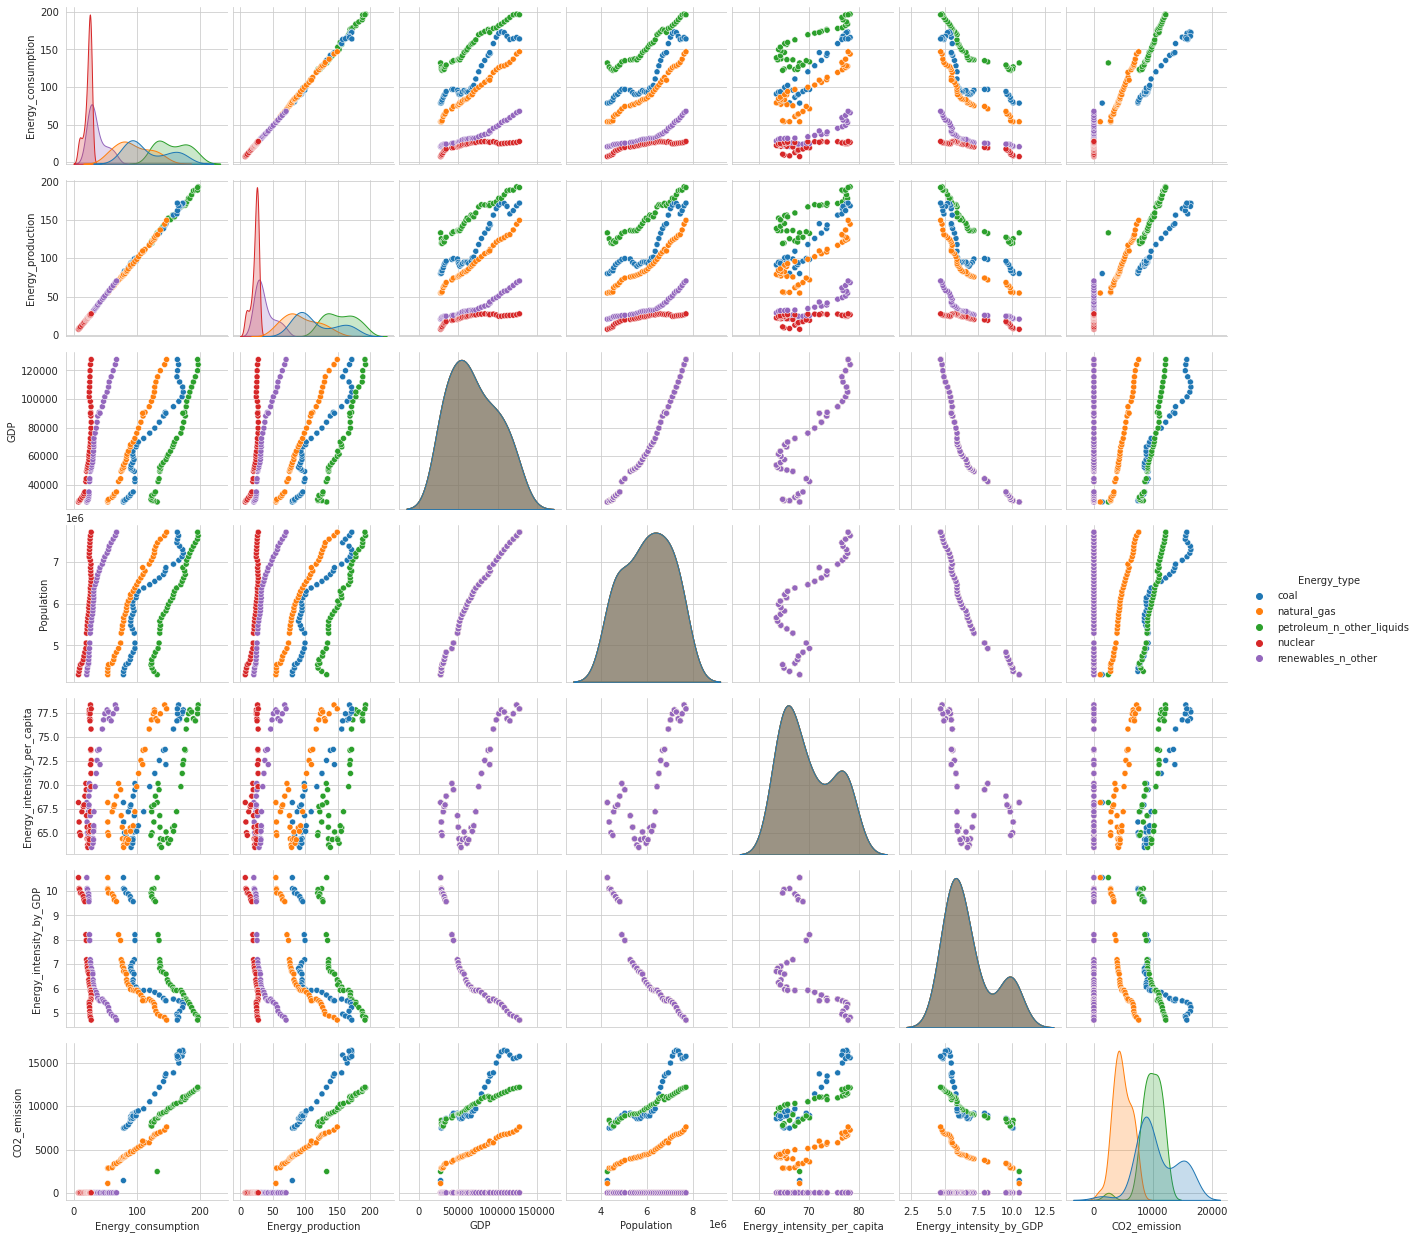

In [49]:
sb.set_style('whitegrid')
sb.pairplot(df[(df['Country'] == 'World') & (df['Energy_type'] != 'all_energy_types')].drop('Year', axis='columns'), size=2.5, hue='Energy_type')

In [8]:
# Check the statistics of the numerical values except Year
df.drop('Year', axis='columns').describe()

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
mean,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,0.018381,5.121971e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822
max,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


In [13]:
# Check how many null values each column has.
percent_missing = round(df.isnull().sum() * 100 / len(df))
missing_value_df = pd.DataFrame({'Number Missing Values': df.isnull().sum(),
                                 'Percent Missing': percent_missing})
missing_value_df

,Number Missing Values,Percent Missing
Country,0,0.0
Energy_type,0,0.0
Year,0,0.0
Energy_consumption,11153,20.0
Energy_production,11151,20.0
GDP,15414,28.0
Population,9426,17.0
Energy_intensity_per_capita,5082,9.0
Energy_intensity_by_GDP,5082,9.0
CO2_emission,3826,7.0


In [31]:
# Focusing on a single country to have better understanding on the context of Null values in the dataset. 
df.loc[(df['Country'] == 'Turkey') & (df['Year'] == 1980)]

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
1254,Turkey,all_energy_types,1980,1.000138,0.383877,416.0833,44101.73,22.677967,2.403696,NaN
1255,Turkey,coal,1980,0.198112,0.166007,416.0833,44101.73,22.677967,2.403696,NaN
1256,Turkey,natural_gas,1980,0.000000,0.000000,416.0833,44101.73,22.677967,2.403696,NaN
1257,Turkey,petroleum_n_other_liquids,1980,0.680190,0.100610,416.0833,44101.73,22.677967,2.403696,NaN
1258,Turkey,nuclear,1980,NaN,NaN,416.0833,44101.73,22.677967,2.403696,0.0
1259,Turkey,renewables_n_other,1980,0.121835,0.117260,416.0833,44101.73,22.677967,2.403696,0.0


According to the above example of Turkey, `Energy_consumption` and `Energy_production` columns are NaN for nuclear `Energy_type` as Turkey didn't have nuclear central in 1980. In addition, Turkey didn't keep the record of CO2 emissions for each `Energy_type`. 

In [14]:
def plot_different_countries(countries):

  fig, ax = plt.subplots(figsize=(12, 6))

  for country in countries:
    ax.plot(
        df.loc[(df['Country'] == country) & (df['Energy_type'] == 'all_energy_types'), ['Year']], 
        df.loc[(df['Country'] == country) & (df['Energy_type'] == 'all_energy_types'), ['CO2_emission']], 
        linewidth=2, marker='o', markersize=8, label=country
    )

  ax.set_xlabel('Year')
  ax.set_ylabel('CO2 Emission')

  ax.set_title('Yearly CO2 Emission of Different Countries') 
  ax.legend()

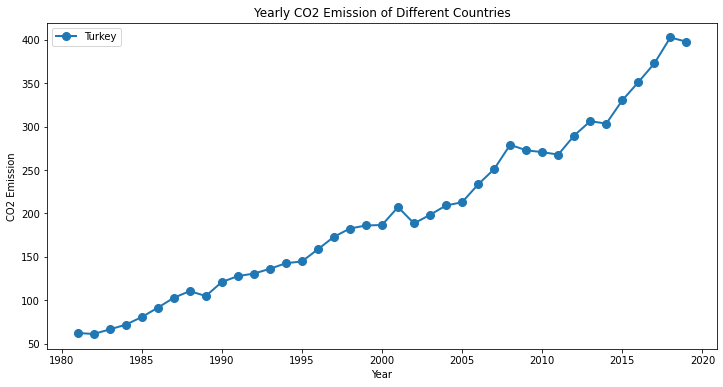

In [24]:
# Let's check when Turkey has started keeping record of CO2 emission by plotting the data yearly basis.

country = ['Turkey']
plot_different_countries(country)

It seems Turkey has been keeping record of CO<sub>2</sub> emission values since 1981.

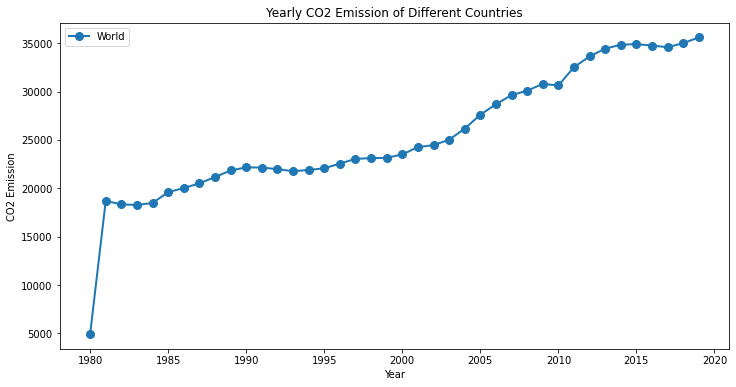

In [25]:
# Let's see situation for the World

country = ['World']
plot_different_countries(country)

When we look at the overall situation, the amount of CO<sub>2</sub> emission is increasing all around the world.\
We see a peek at the CO<sub>2</sub> after 1980 which might be because of the countries that started measuring the CO<sub>2</sub> level after that year as seen in Turkey's case. 

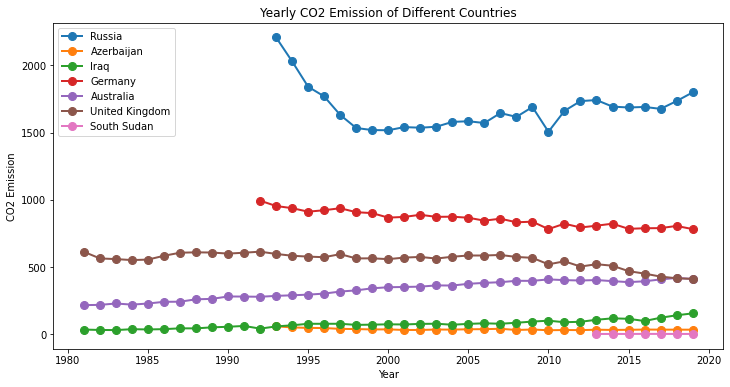

In [26]:
# Let's add a couple of more countries to the plot
countries = ['Russia', 'Azerbaijan', 'Iraq', 'Germany', 'Australia', 'United Kingdom', 'South Sudan']
plot_different_countries(countries)

As you may see in the above plot, Germany's and Azerbaijan's records start in 1990s. Because Germany was in 2 parts until 1990 and Azerbaijan was part of the Former U.S.S.R until 1991. 

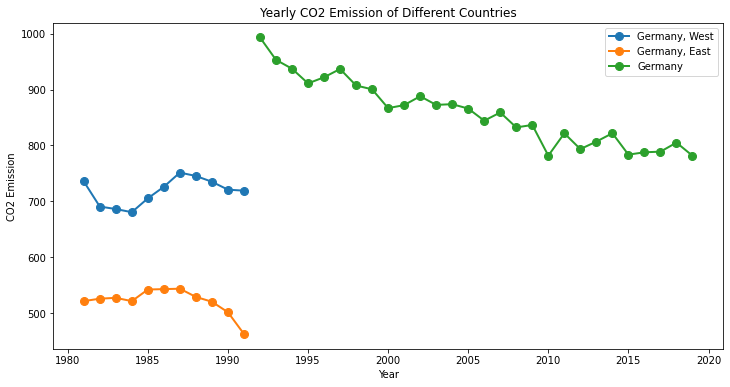

In [27]:
# Check the case for Germany
german_countries = ['Germany, West', 'Germany, East', 'Germany']
plot_different_countries(german_countries)

We can follow 2 different ways to handle the Null values.

*   We can remove all data before 1995 for simplicity which will provide us 14 years of records.
*   OR, we can identify all countries with at least one NaN value in Energy_consumption.

Whichever provides more data to be analyzed can be chosen.


In [50]:
# Remove all data before 1991 for simplicity
df_year_filter = df[df['Year'] >= 1995]
df_year_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34650 entries, 20790 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      34650 non-null  object 
 1   Energy_type                  34650 non-null  object 
 2   Year                         34650 non-null  int64  
 3   Energy_consumption           28616 non-null  float64
 4   Energy_production            28618 non-null  float64
 5   GDP                          30084 non-null  float64
 6   Population                   30228 non-null  float64
 7   Energy_intensity_per_capita  32544 non-null  float64
 8   Energy_intensity_by_GDP      32544 non-null  float64
 9   CO2_emission                 33527 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


In [31]:
# Identify all countries with at least one NaN value in Energy_consumption.
null_countries = df[df['Energy_consumption'].isnull()]['Country'].unique()
#null_countries = np.append(null_countries, 'World') # Since World has the sum of all values in each column we don't need World.
print('Number of countries with NULL values in Energy_consumption column: {}'.format(len(null_countries)))

Number of countries with NULL values in Energy_consumption column: 211


In [32]:
# Remove all countries with at least one NaN value in Energy_consumption column. 
# This is different than .dropna() function as it will keep the values of a country which is not NaN in Energy_consumption column.
# With this way, we'll have a dataset which consists of countries that have full set of data.

df_country_filter = df[~df['Country'].isin(null_countries)]
df_country_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 55379
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      4800 non-null   object 
 1   Energy_type                  4800 non-null   object 
 2   Year                         4800 non-null   int64  
 3   Energy_consumption           4800 non-null   float64
 4   Energy_production            4800 non-null   float64
 5   GDP                          4446 non-null   float64
 6   Population                   4518 non-null   float64
 7   Energy_intensity_per_capita  4800 non-null   float64
 8   Energy_intensity_by_GDP      4800 non-null   float64
 9   CO2_emission                 4650 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 412.5+ KB


Removing all data before 1991 will provide us at least 30K data points. **However**, we should keep in mind that the <ins>World does not reflect the current situation</ins> as it is the sum values of all countries for each year. Now either we should recalculate the values for World or, subrtact the values which are belong to the years 1980 - 1990.

In [51]:
# Removing World
df = df_year_filter[df_year_filter['Country'] != 'World'].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      34500 non-null  object 
 1   Energy_type                  34500 non-null  object 
 2   Year                         34500 non-null  int64  
 3   Energy_consumption           28466 non-null  float64
 4   Energy_production            28468 non-null  float64
 5   GDP                          29934 non-null  float64
 6   Population                   30078 non-null  float64
 7   Energy_intensity_per_capita  32394 non-null  float64
 8   Energy_intensity_by_GDP      32394 non-null  float64
 9   CO2_emission                 33377 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.6+ MB


We'll focus on remaining Null values

In [43]:
df['Country'].nunique()

230

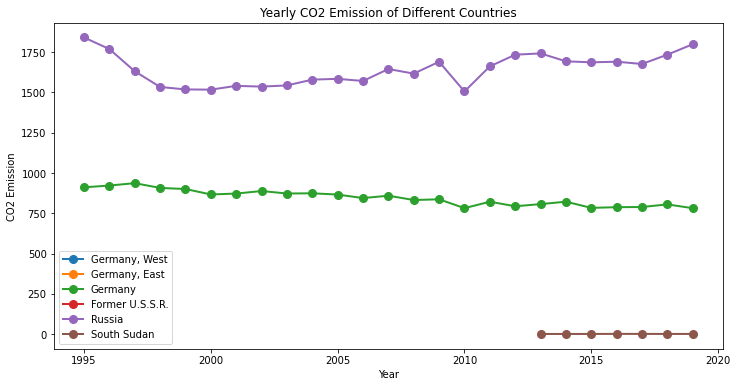

In [42]:
# Let's be sure that there are no data points for the countries that are no longer exist.
german_countries = ['Germany, West', 'Germany, East', 'Germany', 'Former U.S.S.R.', 'Russia', 'South Sudan']
plot_different_countries(german_countries)

In [63]:
def visualize_null_values(data_frame):
  fig, ax = plt.subplots()
  fig.set_size_inches(16, 8)
  ax.set_title('')
  sb.heatmap(data_frame.isnull(), cbar=False)
  plt.xticks(fontsize=14)

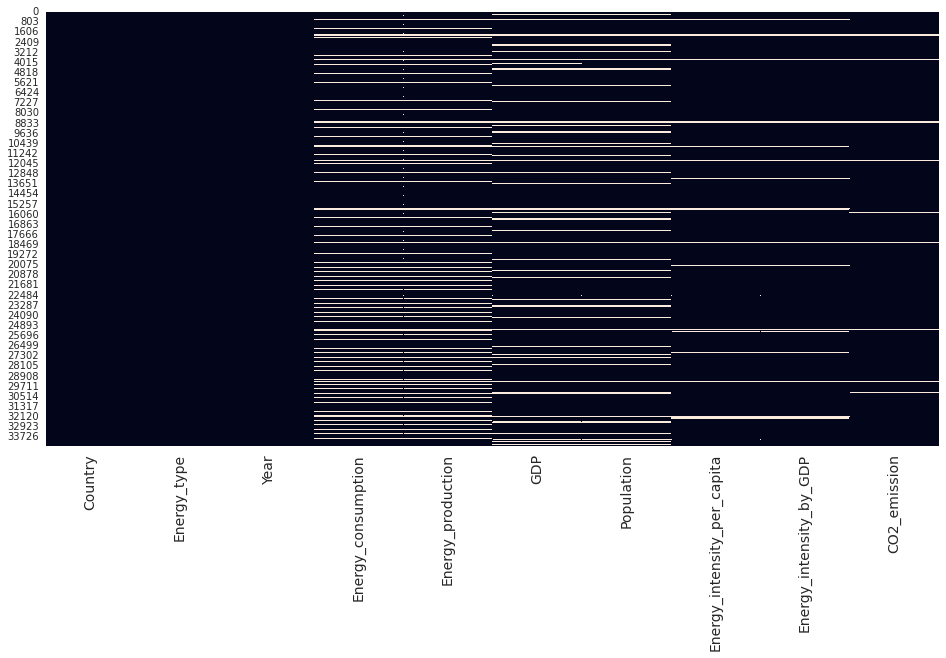

In [64]:
visualize_null_values(df)

In [56]:
# Countries with Null GPD, Population and Energy_consumption values
temp_gdp = pd.DataFrame(df[['GDP', 'Population', 'Energy_consumption']].isnull().groupby(df['Country']).sum()).reset_index()
temp_gdp.sort_values(by=['Energy_consumption'], ascending=False)

,Country,GDP,Population,Energy_consumption
93,Hawaiian Trade Zone,150,150,150
68,Former Czechoslovakia,150,150,150
71,Former Yugoslavia,150,150,150
70,Former U.S.S.R.,150,150,150
79,"Germany, East",150,150,150
...,...,...,...,...
25,Brazil,0,0,0
191,Spain,0,0,0
198,Taiwan,0,0,0
28,Bulgaria,0,0,0


In [57]:
df['Energy_type'].unique()

array(['all_energy_types', 'coal', 'natural_gas',
       'petroleum_n_other_liquids', 'nuclear', 'renewables_n_other'],
      dtype=object)

In [60]:
# Let's focus on single country Hawaiian Trade Zone
df[(df['Country'] == 'Hawaiian Trade Zone') & (df['Energy_type'] == 'all_energy_types')] 

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
558,Hawaiian Trade Zone,all_energy_types,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1938,Hawaiian Trade Zone,all_energy_types,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3318,Hawaiian Trade Zone,all_energy_types,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4698,Hawaiian Trade Zone,all_energy_types,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6078,Hawaiian Trade Zone,all_energy_types,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7458,Hawaiian Trade Zone,all_energy_types,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8838,Hawaiian Trade Zone,all_energy_types,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10218,Hawaiian Trade Zone,all_energy_types,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11598,Hawaiian Trade Zone,all_energy_types,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12978,Hawaiian Trade Zone,all_energy_types,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN


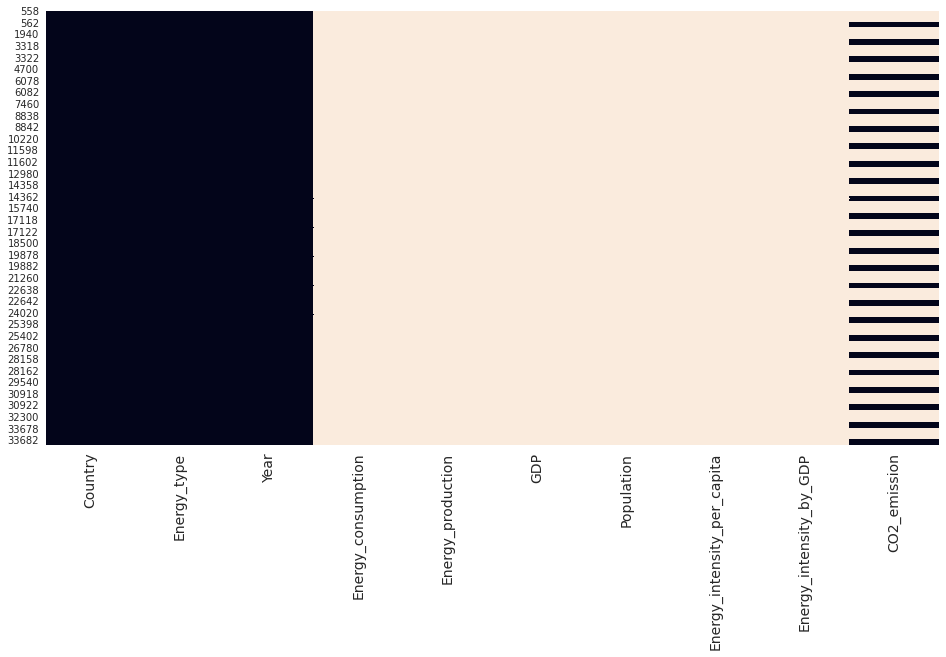

In [65]:
visualize_null_values(df[df['Country'] == 'Hawaiian Trade Zone'])

All countries that have more than 100 Null values in `Energy_consumption` should be removed.

In [67]:
null_countries = temp_gdp[temp_gdp['Energy_consumption'] >= 100]['Country'].unique()
null_countries

array(['Former Czechoslovakia', 'Former U.S.S.R.', 'Former Yugoslavia',
       'Germany, East', 'Germany, West', 'Hawaiian Trade Zone',
       'South Sudan'], dtype=object)

In [68]:
df = df[~df['Country'].isin(null_countries)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33450 entries, 0 to 34499
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      33450 non-null  object 
 1   Energy_type                  33450 non-null  object 
 2   Year                         33450 non-null  int64  
 3   Energy_consumption           28426 non-null  float64
 4   Energy_production            28428 non-null  float64
 5   GDP                          29886 non-null  float64
 6   Population                   30030 non-null  float64
 7   Energy_intensity_per_capita  32346 non-null  float64
 8   Energy_intensity_by_GDP      32346 non-null  float64
 9   CO2_emission                 32999 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.8+ MB


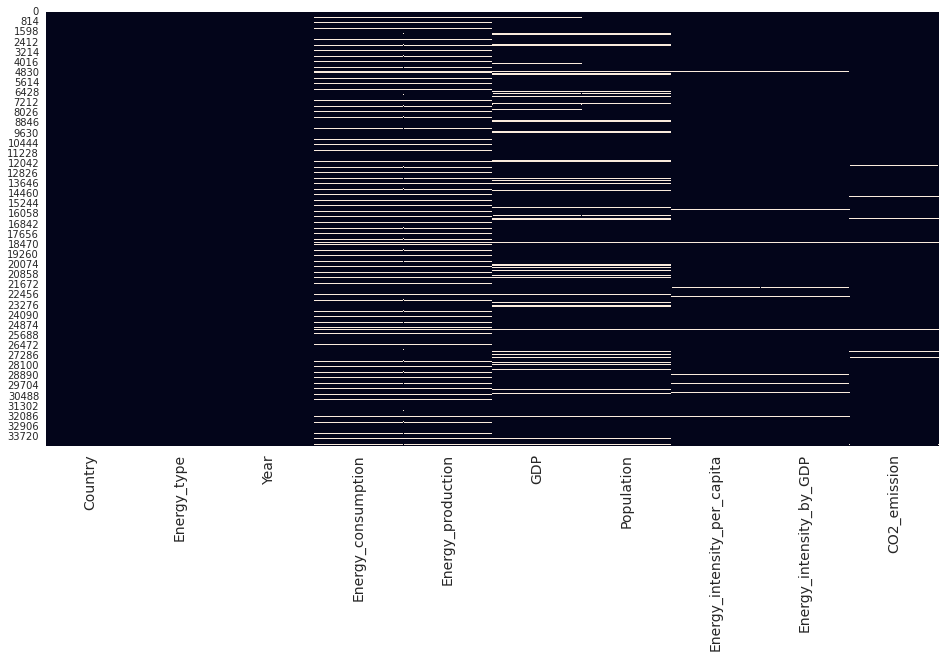

In [69]:
visualize_null_values(df)

In [70]:
# Countries with Null GPD, Population and Energy_consumption values
temp_gdp = pd.DataFrame(df[['GDP', 'Population', 'Energy_consumption']].isnull().groupby(df['Country']).sum()).reset_index()
temp_gdp.sort_values(by=['Energy_consumption'], ascending=False)

,Country,GDP,Population,Energy_consumption
68,Former Serbia and Montenegro,150,150,95
105,Kosovo,78,78,90
130,Montenegro,66,66,80
174,Serbia,66,66,80
196,Timor-Leste,48,48,65
...,...,...,...,...
25,Brazil,0,0,0
184,Spain,0,0,0
191,Taiwan,0,0,0
28,Bulgaria,0,0,0


All countries that have more than 100 Null values in `GDP` and `Population` should be removed.

In [71]:
null_countries = temp_gdp[(temp_gdp['GDP'] >= 100) & (temp_gdp['Population'] >= 100)]['Country'].unique()
null_countries

array(['Antarctica', 'Cook Islands', 'Falkland Islands', 'Faroe Islands',
       'Former Serbia and Montenegro', 'French Guiana',
       'French Polynesia', 'Gibraltar', 'Micronesia', 'Montserrat',
       'Nauru', 'New Caledonia', 'Niue', 'Saint Helena',
       'Saint Pierre and Miquelon', 'Turks and Caicos Islands', 'Tuvalu',
       'U.S. Pacific Islands', 'U.S. Territories', 'Wake Island',
       'Western Sahara'], dtype=object)

In [72]:
df = df[~df['Country'].isin(null_countries)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30300 entries, 0 to 34499
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      30300 non-null  object 
 1   Energy_type                  30300 non-null  object 
 2   Year                         30300 non-null  int64  
 3   Energy_consumption           25801 non-null  float64
 4   Energy_production            25802 non-null  float64
 5   GDP                          29886 non-null  float64
 6   Population                   30030 non-null  float64
 7   Energy_intensity_per_capita  29280 non-null  float64
 8   Energy_intensity_by_GDP      29280 non-null  float64
 9   CO2_emission                 30052 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


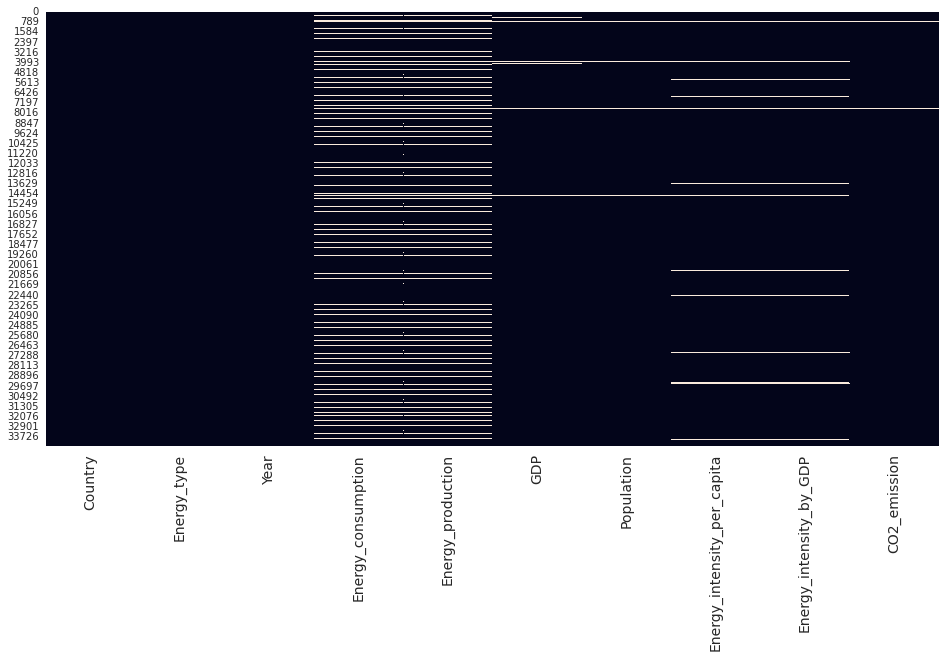

In [73]:
visualize_null_values(df)

In [74]:
# Remove the dublicates
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30300 entries, 0 to 30299
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      30300 non-null  object 
 1   Energy_type                  30300 non-null  object 
 2   Year                         30300 non-null  int64  
 3   Energy_consumption           25801 non-null  float64
 4   Energy_production            25802 non-null  float64
 5   GDP                          29886 non-null  float64
 6   Population                   30030 non-null  float64
 7   Energy_intensity_per_capita  29280 non-null  float64
 8   Energy_intensity_by_GDP      29280 non-null  float64
 9   CO2_emission                 30052 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.3+ MB


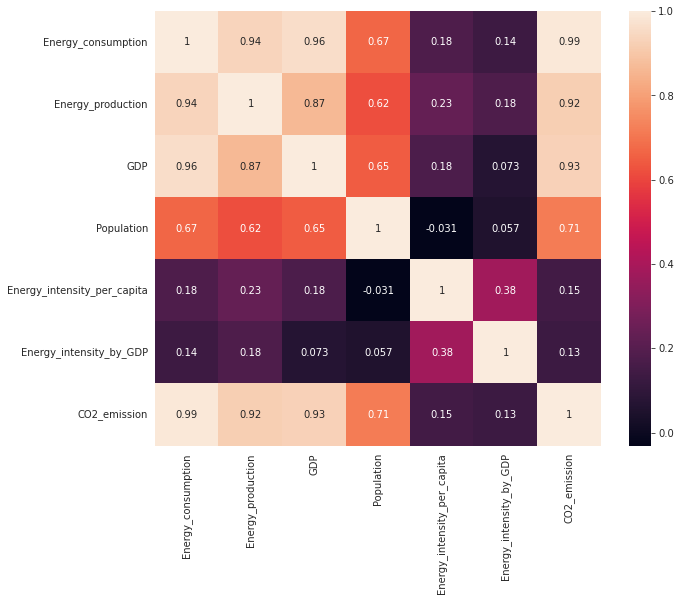

In [75]:
# Having this correlation would be sufficient only for all_energy_types
fig, ax = plt.subplots(figsize=(10, 8))
corr = df[df['Energy_type'] == 'all_energy_types'].drop('Year', axis='columns').corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)

As can be seen on the above heatmap, `CO2_emission` has a strong positive correlation with `Energy_consumption`, `Enery_production` and `GDP`. 
Let's see if it's differs from country to country.

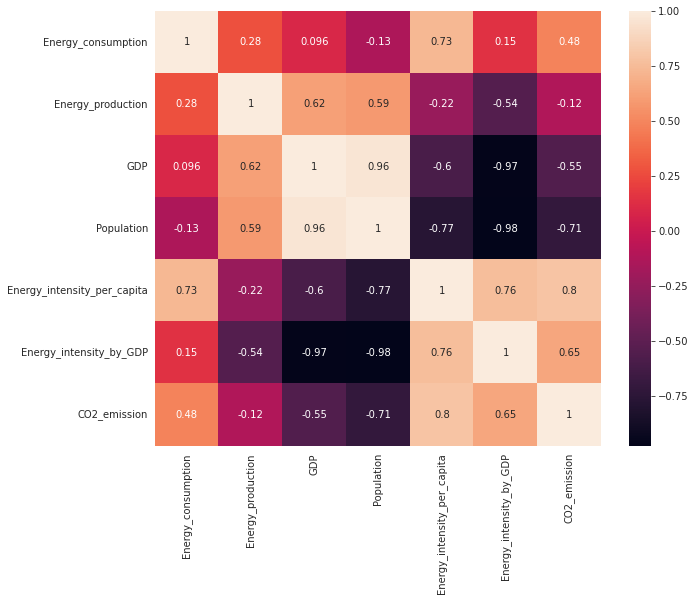

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df[(df['Country'] == 'Belgium') & (df['Energy_type'] == 'all_energy_types')].drop('Year', axis='columns').corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)

As can be seen on the above heatmap, we can't say that the `CO2_emission` has not as storng relationship as other countries with `Energy_production`. It's the same for `GDP` as well.

Next steps (challanges) for further analysis:
*   Merge the Germay, West and Germany, East and replace the country names with Germany. Replace Germany records until 1990 with merged data.
*   Former USSR can be distributed to different countries based on the population.
*   Remove countries with a lot of Null values and recalculate the values for World.
*   Using KNN imputer to handle missing values.